In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


### Car Detection Dataset


In [ ]:
cd /content

/content


In [ ]:
! kaggle datasets download sshikamaru/car-object-detection


 84% 94.0M/112M [00:01<00:00, 66.5MB/s]
100% 112M/112M [00:01<00:00, 92.8MB/s] 


In [ ]:
!unzip /content/car-object-detection.zip


Archive:  /content/car-object-detection.zip
  inflating: data/sample_submission.csv  
  inflating: data/testing_images/vid_5_25100.jpg  
  inflating: data/testing_images/vid_5_25120.jpg  
  inflating: data/testing_images/vid_5_25140.jpg  
  inflating: data/testing_images/vid_5_25160.jpg  
  inflating: data/testing_images/vid_5_25180.jpg  
  inflating: data/testing_images/vid_5_25200.jpg  
  inflating: data/testing_images/vid_5_25220.jpg  
  inflating: data/testing_images/vid_5_25240.jpg  
  inflating: data/testing_images/vid_5_25260.jpg  
  inflating: data/testing_images/vid_5_26320.jpg  
  inflating: data/testing_images/vid_5_26400.jpg  
  inflating: data/testing_images/vid_5_26420.jpg  
  inflating: data/testing_images/vid_5_26560.jpg  
  inflating: data/testing_images/vid_5_26580.jpg  
  inflating: data/testing_images/vid_5_26600.jpg  
  inflating: data/testing_images/vid_5_26620.jpg  
  inflating: data/testing_images/vid_5_26640.jpg  
  inflating: data/testing_images/vid_5_26660.jp

In [ ]:
cd /content/data/training_images

/content/data/training_images


## show some of Images 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


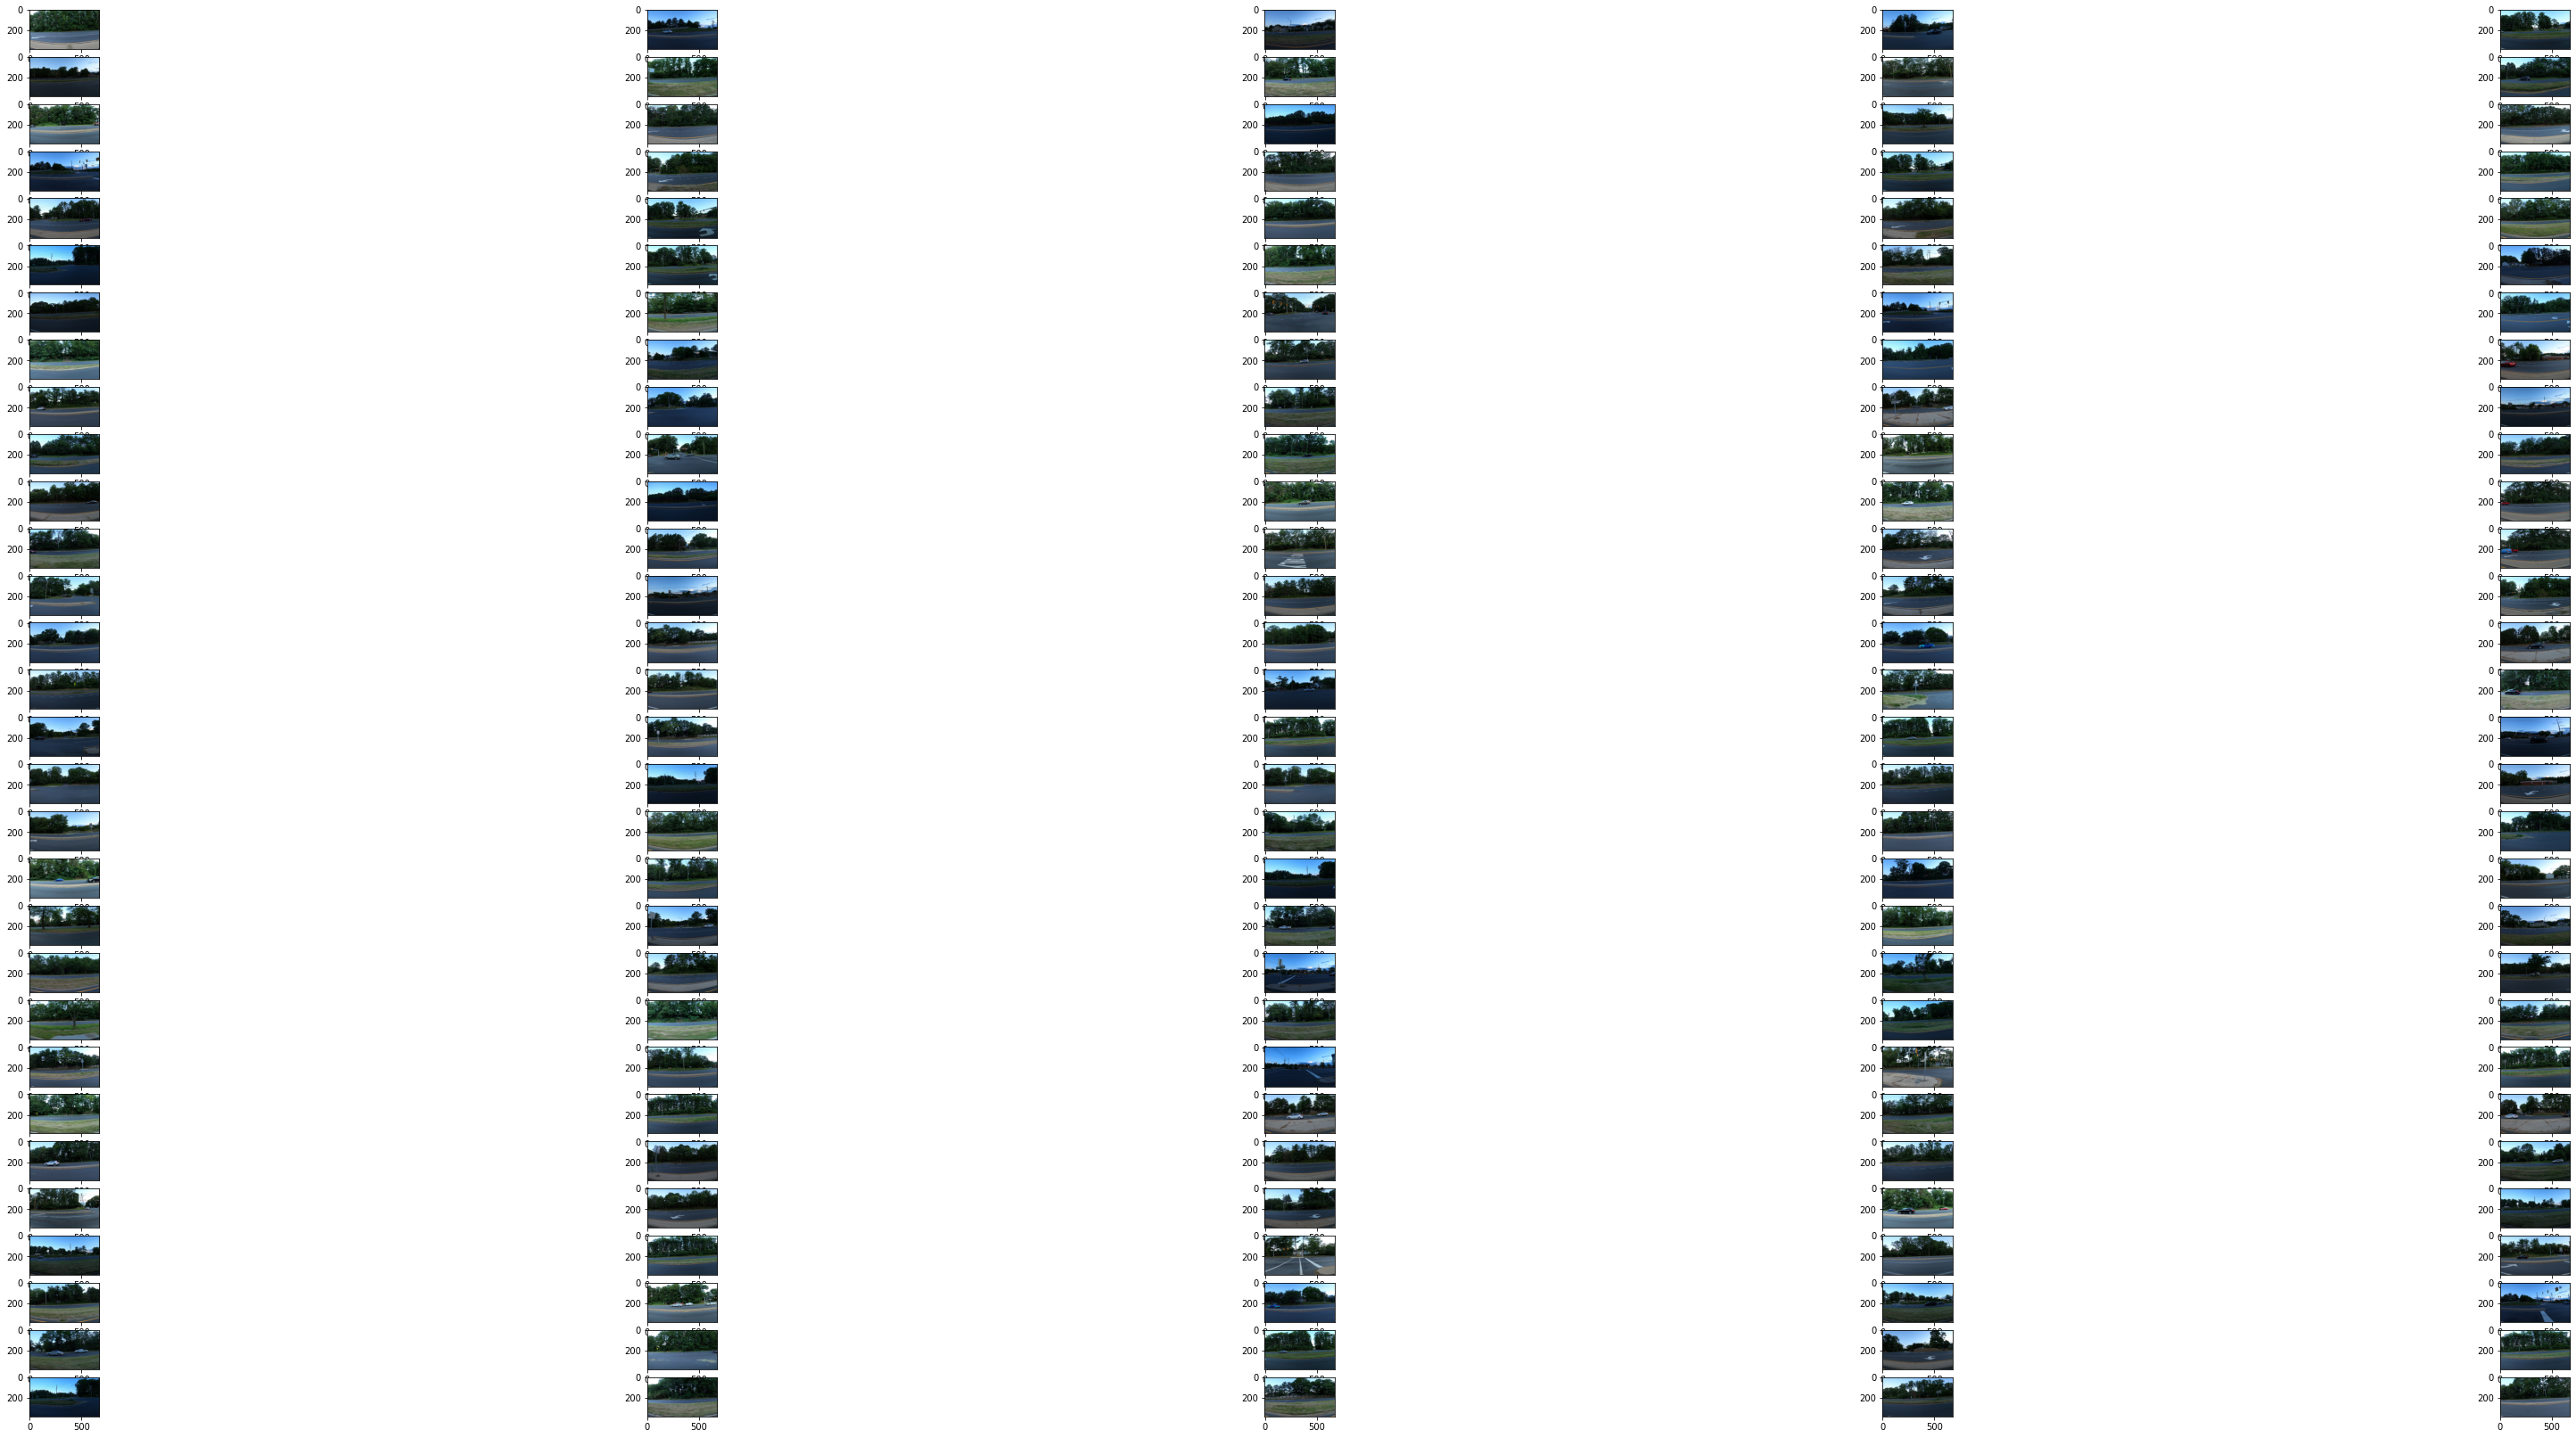

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
i=0
images = []
for img_path in glob.glob('*.jpg'):
    print(len(images))
    images.append(mpimg.imread((img_path))) 
    i+=1
    if (i==150):
      break

plt.figure(figsize=(60,30))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

# 1- Prepare Dataset 

### Copy dataset to Google Drive 
Link: https://drive.google.com/drive/folders/1AzmrLet78KUL6y4ur84ZO1ISm9uN9jTw?usp=sharing 

In [ ]:
!cp -R /content/data/training_images/* /content/drive/MyDrive/GANs/Pix2Pix/Dataset/Original

## Store images in list to be able to edit on them

In [ ]:
import glob

i=0
original_images = []
for img_path in glob.glob('*.jpg'):
    #print(len(images))
    original_images.append(cv2.imread((img_path))) 
    i+=1
    if (i==1000):
      break

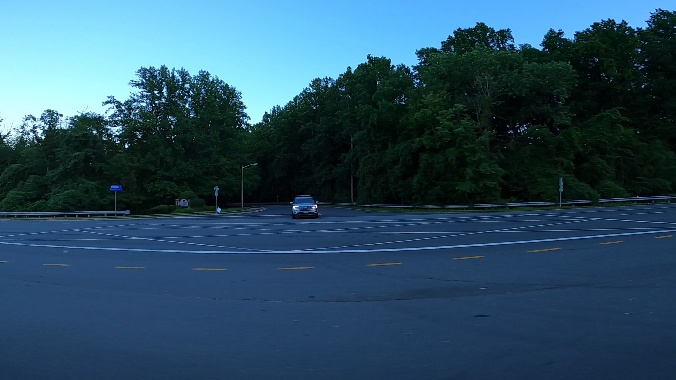

In [ ]:
cv2_imshow(original_images[1])

## Store the dataset as original images in drive and rename it (1.jpg to 1000.jpg)

In [ ]:
import cv2 
import numpy as np

count =0
for i in range (len(original_images)):
  x=(original_images[i])
  cv2.imwrite('/content/drive/MyDrive/GANs/Pix2Pix/Dataset/Original/'+str(count)+'.jpg',x) 
  count +=1

## Generate Simulated Dataset which are called Target Imgaes

---



In [ ]:
!pip install daltonize

In [ ]:
cd /content/drive/MyDrive/GANs/Pix2Pix/Dataset/Original

/content/drive/MyDrive/GANs/Pix2Pix /Dataset/Original


* Test Simulator

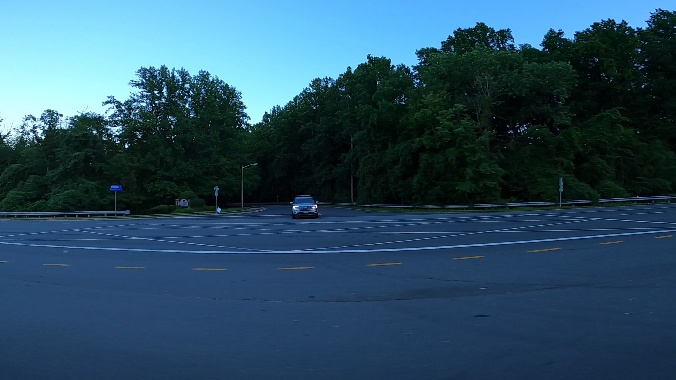

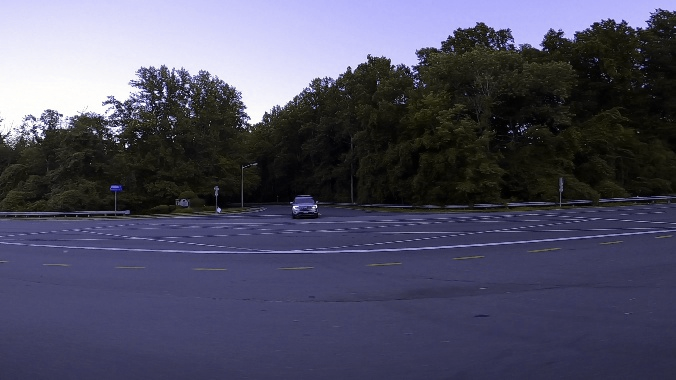

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from daltonize import daltonize

img= cv2.imread('vid_4_1000.jpg')
simul_rgb_t = daltonize.simulate(img,'t')
cv2_imshow (img)
cv2_imshow (simul_rgb_t)


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from daltonize import daltonize

simulated =[] ## list to store target images
for i in range (len (original_images)):
  simul_rgb_t = daltonize.simulate(original_images[i],'t')
  simulated.append(simul_rgb_t)
#cv2_imshow (simulated[0])

# Store target images in drive 

In [ ]:
import cv2 
import numpy as np

count =0
for i in range (len(simulated)):
  x=np.float64(simulated[i])
  cv2.imwrite('/content/drive/MyDrive/GANs/Pix2Pix/Dataset/Target/'+str(count)+'.jpg',x) 
  count +=1

# Now, The data is ready to enter GANs Architecture 

Original Img : https://drive.google.com/drive/folders/1CHw7G2swSGxme4sC1kMONXtmL_t5nATs?usp=sharing 


Target Img : https://drive.google.com/drive/folders/1g17qKSLv84XcmJEM65hZiWAFeoQ8PZm2?usp=sharing 

* 1- install and import dependencies 

In [ ]:
!pip install albumentations==0.4.6
import albumentations 
from albumentations.pytorch import ToTensorV2
import torch
torch.cuda.is_available()

True

* 2- set some paramaters

In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2 ##to convert to tensor

"""Check current device is GPU"""
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


""" Add folder path of Train images and test images """
TRAIN_DIR = "/content/drive/MyDrive/GANs/Pix2Pix/Dataset"
VAL_DIR = "/content/drive/MyDrive/GANs/Pix2Pix/Testset"

LEARNING_RATE = 2e-4
BATCH_SIZE = 16
NUM_WORKERS = 2
IMAGE_SIZE = 256
CHANNELS_IMG = 3

L1_LAMBDA = 100
LAMBDA_GP = 10

NUM_EPOCHS = 200

LOAD_MODEL = False
SAVE_MODEL = True

CHECKPOINT_DISC = "disc.pth.tar"
CHECKPOINT_GEN = "gen.pth.tar"


* 3- Create class for loading dataset in PyTorch

In [ ]:
import numpy as np
import os
from PIL import Image
from torch.utils.data import Dataset , DataLoader
from torchvision.utils import save_image
import torchvision.transforms as transforms

"""Building Efficient Custom Datasets in PyTorch """
class MapDataset(Dataset): 
  
  """ Get and Save the directory of origianl and Target Images
  """
  def __init__(self, root_dir):
    self.root_dir = root_dir #which is TRAIN_DIR which contains 2 folders (Original and Target)
    self.root_dir_original = os.path.join(self.root_dir, "Original") ## get the path of  Orignal Folder which contain orignial img
    self.root_dir_target = os.path.join(self.root_dir, "Target") ## get the path of Target Folder which contain target img
    
    self.list_files_original = os.listdir(self.root_dir_original )
    self.list_files_target = os.listdir(self.root_dir_target)
  
  """Return the size of the dataset"""
  def __len__(self):
    #print("HI")
    #print(len(self.list_files_a))
    #print(len(self.list_files_b))
    return len(self.list_files_target)

  """Return a sample from the dataset given an index."""
  def __getitem__(self, index):
    input_img_file = self.list_files_original[index]
    target_img_file = self.list_files_target[index]

    #print("input_img_file" ,input_img_file)
    #print("target_img_file" ,target_img_file)

    input_img_path = os.path.join(self.root_dir_original, input_img_file)
    target_img_path = os.path.join(self.root_dir_target, target_img_file)

    #print ("input_img_path"  ,input_img_path)
    #print ("target_img_path"  ,target_img_path)
    
    input_image = np.array(Image.open(input_img_path))
    target_image = np.array(Image.open(target_img_path))

    """Image Augmentation """
    both_transform = A.Compose(
    [A.Resize(width=256, height=256),], additional_targets={"image0": "image"}, ##support 2 input images
    )
    
    transform_only_input = A.Compose(
    [
    A.HorizontalFlip(p=0.5),A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
        ToTensorV2(),
    ]
    )

    transform_only_mask = A.Compose(
    [
        A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
        ToTensorV2(),
    ]
    )

    """Apply Augmentation on original and target images"""
    augmentations = both_transform(image=input_image, image0=target_image)
    input_image = augmentations["image"]
    target_image = augmentations["image0"]

    input_image = transform_only_input(image=input_image)["image"]
    target_image = transform_only_mask(image=target_image)["image"]

    return input_image, target_image

"""
if __name__ == "__main__":
    dataset = MapDataset("/content/drive/MyDrive/GANs/Pix2Pix/Dataset")
    loader = DataLoader(dataset, batch_size=5)
    for x, y in loader:
        print(x.shape)
"""

'\nif __name__ == "__main__":\n    dataset = MapDataset("/content/drive/MyDrive/GANs/Pix2Pix/Dataset")\n    loader = DataLoader(dataset, batch_size=5)\n    for x, y in loader:\n        print(x.shape)\n'

* 4- Disriminator Architecture

In [ ]:
import torch
import torch.nn as nn

"""Create CNN Arch to use it later"""
class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(CNNBlock, self).__init__()
        
        """Create Sequnetial Model"""
        self.conv = nn.Sequential(
            nn.Conv2d(  ##Apply a 2D convolution 
                in_channels, out_channels, 2, stride, bias=False ),
                nn.BatchNorm2d(out_channels), ##Apply BatchNormalization
                nn.LeakyReLU(0.2), ##Activation Function. It is recommended in GANs
        )

    def forward(self, x):
        return self.conv(x)

"""Create discriminator Arch"""
class Discriminator(nn.Module):
    def __init__(self, in_channels=3, features=[64, 128, 256, 512]):
        super().__init__()
        
        """Initial Layer"""
        self.initial = nn.Sequential(
            nn.Conv2d(
                in_channels * 2,
                features[0],
                kernel_size=2,
                stride=2),
            nn.LeakyReLU(0.2),
        )

        layers = []
        in_channels = features[0]
        
        for feature in features[1:]:
            layers.append(
                CNNBlock(in_channels, feature, stride=1 if feature == features[-1] else 2),
            )
            in_channels = feature

        layers.append(
            nn.Conv2d(
                in_channels, 1, kernel_size=2, stride=1  ),
        )

        self.model = nn.Sequential(*layers)

    def forward(self, x, y):
        x = torch.cat([x, y], dim=1)
        x = self.initial(x)
        x = self.model(x)
        return x

'''
def test():
    x = torch.randn((1, 3, 256, 256))
    y = torch.randn((1, 3, 256, 256))
    model = Discriminator(in_channels=3)
    preds = model(x, y)
    print(model)
    print(preds.shape)


if __name__ == "__main__":
    test()'''

'\ndef test():\n    x = torch.randn((1, 3, 256, 256))\n    y = torch.randn((1, 3, 256, 256))\n    model = Discriminator(in_channels=3)\n    preds = model(x, y)\n    print(model)\n    print(preds.shape)\n\n\nif __name__ == "__main__":\n    test()'

* 5- Generator Arch

In [ ]:
import torch
import torch.nn as nn


class Block(nn.Module):
    def __init__(self, in_channels, out_channels, down=True, act="relu", use_dropout=False):
        super(Block, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 2, 2, bias=False)
            if down
            else nn.ConvTranspose2d(in_channels, out_channels, 2, 2, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU() if act == "relu" else nn.LeakyReLU(0.2),
        )

        self.use_dropout = use_dropout
        self.dropout = nn.Dropout(0.5)
        self.down = down

    def forward(self, x):
        x = self.conv(x)
        return self.dropout(x) if self.use_dropout else x


class Generator(nn.Module):
    def __init__(self, in_channels=3, features=64):
        super().__init__()
        """Create Initial CNN Layer"""
        self.initial_down = nn.Sequential(
            nn.Conv2d(in_channels, features, 2, 2),
            nn.LeakyReLU(0.2),
        )
        """Create blocks of Encoder layers"""
        self.down1 = Block(features, features * 2, down=True, act="leaky", use_dropout=False)
        self.down2 = Block(
            features * 2, features * 4, down=True, act="leaky", use_dropout=False
        )
        self.down3 = Block(
            features * 4, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down4 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down5 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down6 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )

        """Bottleneck Layer"""
        self.bottleneck = nn.Sequential(
            nn.Conv2d(features * 8, features * 8, 2, 2), nn.ReLU()
        )

        """Create Blocks of Decoder"""
        self.up1 = Block(features * 8, features * 8, down=False, act="relu", use_dropout=True)
        self.up2 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=True
        )
        self.up3 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=True
        )
        self.up4 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=False
        )
        self.up5 = Block(
            features * 8 * 2, features * 4, down=False, act="relu", use_dropout=False
        )
        self.up6 = Block(
            features * 4 * 2, features * 2, down=False, act="relu", use_dropout=False
        )
        self.up7 = Block(features * 2 * 2, features, down=False, act="relu", use_dropout=False)
        
        self.final_up = nn.Sequential(
            nn.ConvTranspose2d(features * 2, in_channels, kernel_size=2, stride=2),
            nn.Tanh(),
        )

    def forward(self, x):
        d1 = self.initial_down(x)
        d2 = self.down1(d1)
        d3 = self.down2(d2)
        d4 = self.down3(d3)
        d5 = self.down4(d4)
        d6 = self.down5(d5)
        d7 = self.down6(d6)
        bottleneck = self.bottleneck(d7)
        up1 = self.up1(bottleneck)
        up2 = self.up2(torch.cat([up1, d7], 1))
        up3 = self.up3(torch.cat([up2, d6], 1))
        up4 = self.up4(torch.cat([up3, d5], 1))
        up5 = self.up5(torch.cat([up4, d4], 1))
        up6 = self.up6(torch.cat([up5, d3], 1))
        up7 = self.up7(torch.cat([up6, d2], 1))
        return self.final_up(torch.cat([up7, d1], 1))


def test():
    x = torch.randn((1, 3, 256, 256))
    model = Generator(in_channels=3, features=64)
    preds = model(x)
    print(preds.shape)

'''
if __name__ == "__main__":
    test()'''

'\nif __name__ == "__main__":\n    test()'

* 6- Implement Hepler functions to save some examples

In [ ]:
import torch
from torchvision.utils import save_image

def save_some_examples(gen, val_loader, epoch, folder):
    x, y = next(iter(val_loader))
    x, y = x.to(DEVICE), y.to(DEVICE)

    gen.eval()
    with torch.no_grad():
        y_fake = gen(x)
        y_fake = y_fake * 0.5 + 0.5  # remove normalization#
        save_image(y_fake, folder + f"/y_gen_{epoch}.png")
        save_image(x * 0.5 + 0.5, folder + f"/input_{epoch}.png")
        if epoch == 1:
            save_image(y * 0.5 + 0.5, folder + f"/label_{epoch}.png")
    gen.train()


def save_checkpoint(model, optimizer, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }
    torch.save(checkpoint, filename)


def load_checkpoint(checkpoint_file, model, optimizer, lr):
    print("=> Loading checkpoint")
    checkpoint = torch.load(checkpoint_file, map_location=DEVICE)
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    # If we don't do this then it will just have learning rate of old checkpoint
    # and it will lead to many hours of debugging \:
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr


* Train

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.utils import save_image

torch.backends.cudnn.benchmark = True

def train_fn(disc, gen, loader, opt_disc, opt_gen, l1_loss, bce, g_scaler, d_scaler,):
    
    loop = tqdm(loader, leave=True)

    for idx, (x, y) in enumerate(loop):
        x = x.to(DEVICE)
        y = y.to(DEVICE)
      
        # Train Discriminator
        with torch.cuda.amp.autocast():
            y_fake = gen(x)
            D_real = disc(x, y)
            D_real_loss = bce(D_real, torch.ones_like(D_real))
            D_fake = disc(x, y_fake.detach())
            D_fake_loss = bce(D_fake, torch.zeros_like(D_fake))
            D_loss = (D_real_loss + D_fake_loss) / 2

        disc.zero_grad()
        d_scaler.scale(D_loss).backward()
        d_scaler.step(opt_disc)
        d_scaler.update()

        # Train generator
        with torch.cuda.amp.autocast():
            D_fake = disc(x, y_fake)
            G_fake_loss = bce(D_fake, torch.ones_like(D_fake))
            L1 = l1_loss(y_fake, y) * L1_LAMBDA
            G_loss = G_fake_loss + L1

        opt_gen.zero_grad()
        g_scaler.scale(G_loss).backward()
        g_scaler.step(opt_gen)
        g_scaler.update()

        if idx % 10 == 0:
            loop.set_postfix(
                D_real=torch.sigmoid(D_real).mean().item(),
                D_fake=torch.sigmoid(D_fake).mean().item(),
            )


def main():
    disc = Discriminator(in_channels=3).to(DEVICE)
    gen = Generator(in_channels=3, features=64).to(DEVICE)
    opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999),)
    opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
    BCE = nn.BCEWithLogitsLoss()
    L1_LOSS = nn.L1Loss()

    if LOAD_MODEL:
        load_checkpoint(CHECKPOINT_GEN, gen, opt_gen, LEARNING_RATE, )
        load_checkpoint(CHECKPOINT_DISC, disc, opt_disc,LEARNING_RATE, )

    train_dataset = MapDataset(root_dir=TRAIN_DIR) ###################################3
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=NUM_WORKERS,
    )
    

    
    g_scaler = torch.cuda.amp.GradScaler()
    d_scaler = torch.cuda.amp.GradScaler()
    val_dataset = MapDataset(root_dir=VAL_DIR) ######################################################3
    val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

    for epoch in range(NUM_EPOCHS):
        gen.cuda()
        disc.cuda()
        train_fn(
            disc, gen, train_loader, opt_disc, opt_gen, L1_LOSS, BCE, g_scaler, d_scaler,
        )
        
        if SAVE_MODEL and epoch % 5 == 0:
            save_checkpoint(gen, opt_gen, filename=CHECKPOINT_GEN)
            save_checkpoint(disc, opt_disc, filename=CHECKPOINT_DISC)
            #torch.save(gen.state_dict(),'/content/saved_models/gen2.pt' )
       
        save_some_examples(gen, val_loader, epoch, folder="evaluation4")

    torch.save(gen.state_dict(),'/content/saved_models/gen2.pt' )
    #torch.save(gen.state_dict(),'/content/saved_models/gen2.pkl' )

if __name__ == "__main__":
    main()

100%|██████████| 62/62 [05:25<00:00,  5.25s/it, D_fake=0.129, D_real=0.835]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.382, D_real=0.699]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.377, D_real=0.663]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.397, D_real=0.734]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.381, D_real=0.648]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.365, D_real=0.713]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.376, D_real=0.847]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.348, D_real=0.732]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.37, D_real=0.55]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.4, D_real=0.733]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.402, D_real=0.537]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.404, D_real=0.546]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.365, D_real=0.75]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.386, D_real=0.442]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.438, D_real=0.583]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.418, D_real=0.724]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.424, D_real=0.502]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.376, D_real=0.654]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.302, D_real=0.756]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.432, D_real=0.596]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.424, D_real=0.732]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.406, D_real=0.642]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:27<00:00,  2.21it/s, D_fake=0.565, D_real=0.455]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.481, D_real=0.584]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.32, D_real=0.579]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.449, D_real=0.657]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.519, D_real=0.477]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.487, D_real=0.513]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.467, D_real=0.619]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.435, D_real=0.646]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.57, D_real=0.479]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.19it/s, D_fake=0.422, D_real=0.612]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.508, D_real=0.474]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.411, D_real=0.518]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.561, D_real=0.491]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.404, D_real=0.554]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.549, D_real=0.404]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.396, D_real=0.589]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.395, D_real=0.578]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.21it/s, D_fake=0.427, D_real=0.452]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 62/62 [00:28<00:00,  2.20it/s, D_fake=0.466, D_real=0.425]


In [ ]:
!cp -r /content/evaluation4 /content/drive/MyDrive/GANs/Pix2Pix